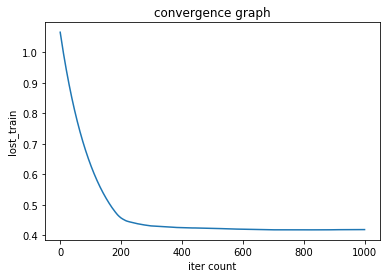

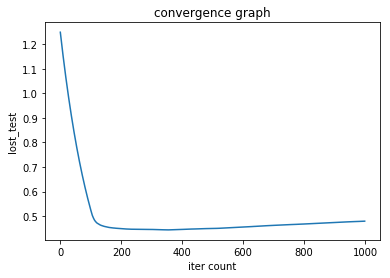

In [14]:
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X,y = load_svmlight_file("/Users/yj/文件/数据集/australian_scale" )
X = X.toarray()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#计算损失函数
def loss(W,b,X,Y,C=1):
    N,dim = X.shape
    hinge_loss = 0
    for i in range(N):
        t = 1 - Y[i]*( W.dot(X[i].T) + b  )
        hinge_loss += max( 0 , t)
    data_loss = 0.5*np.sum( W **2 ) + C * hinge_loss
    data_loss /= N
    return data_loss 

#梯度下降算法
def gradientDescent(X,Y,W,b,C=0.9):

    N,dim = X.shape
    dW = np.zeros(dim).T
    db = 0
    for i in range(N):
        if (1 - Y[i]*( W.dot(X[i].T) + b  ) ) >=0:
            dW += W.T - C * (Y[i] * X[i]).T
            db += - C * Y[i]
        else:
            dW += W
    return dW, db
        
def train(X,Y,step=0.01,iterNum=1000):
    N,dim = X.shape
    W = np.zeros(dim)
    b = 1
    
    loss_history = []
    for i in range(iterNum):
        W += -step * ( gradientDescent(X,Y,W,b)[0] ) / N
        b += -step * ( gradientDescent(X,Y,W,b)[1] ) / N
        Loss = loss(W,b,X,Y)
        loss_history.append(Loss)
    return loss_history


step = 0.01
iternum = 1000
L_train = train(X_train,y_train,step,iternum)
L_test = train(X_test,y_test,step,iternum)


plt.plot(L_train)
plt.ylabel('lost_train')
plt.xlabel('iter count')
plt.title('convergence graph')
plt.show()

plt.plot(L_test)
plt.ylabel('lost_test')
plt.xlabel('iter count')
plt.title('convergence graph')
plt.show()